In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib
import pickle

In [2]:
df = pd.read_csv('framingham_resampled.csv')

In [3]:
features = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
            'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
            'diaBP', 'BMI', 'heartRate', 'glucose']
target = 'TenYearCHD'

In [4]:
df = df[features + [target]].dropna()

In [5]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 5: Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Step 6: Evaluate the model
y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       622
           1       0.94      0.88      0.91       619

    accuracy                           0.91      1241
   macro avg       0.91      0.91      0.91      1241
weighted avg       0.91      0.91      0.91      1241

Accuracy Score: 0.911361804995971


In [8]:
# Step 7: Save the model in Pickle format
with open('rf_model.pkl', 'wb') as pkl_file:
    pickle.dump(rf_model, pkl_file)
print("Model saved as rf_model.pkl")

Model saved as rf_model.pkl


In [9]:
# Step 8: Save the model in Joblib format
joblib.dump(rf_model, 'rf_model.joblib')
print("Model saved as rf_model.joblib")

Model saved as rf_model.joblib


In [10]:
# Step 9: Load the model from Pickle and make inference
with open('rf_model.pkl', 'rb') as pkl_file:
    loaded_model_pickle = pickle.load(pkl_file)

In [11]:
sample_input = X_test.iloc[0:1]  # Take one sample from the test set
prediction_pickle = loaded_model_pickle.predict(sample_input)
print("Prediction from Pickle model:", prediction_pickle[0])

Prediction from Pickle model: 1


In [12]:
# Step 10: Load the model from Joblib and make inference
loaded_model_joblib = joblib.load('rf_model.joblib')
prediction_joblib = loaded_model_joblib.predict(sample_input)
print("Prediction from Joblib model:", prediction_joblib[0])

Prediction from Joblib model: 1


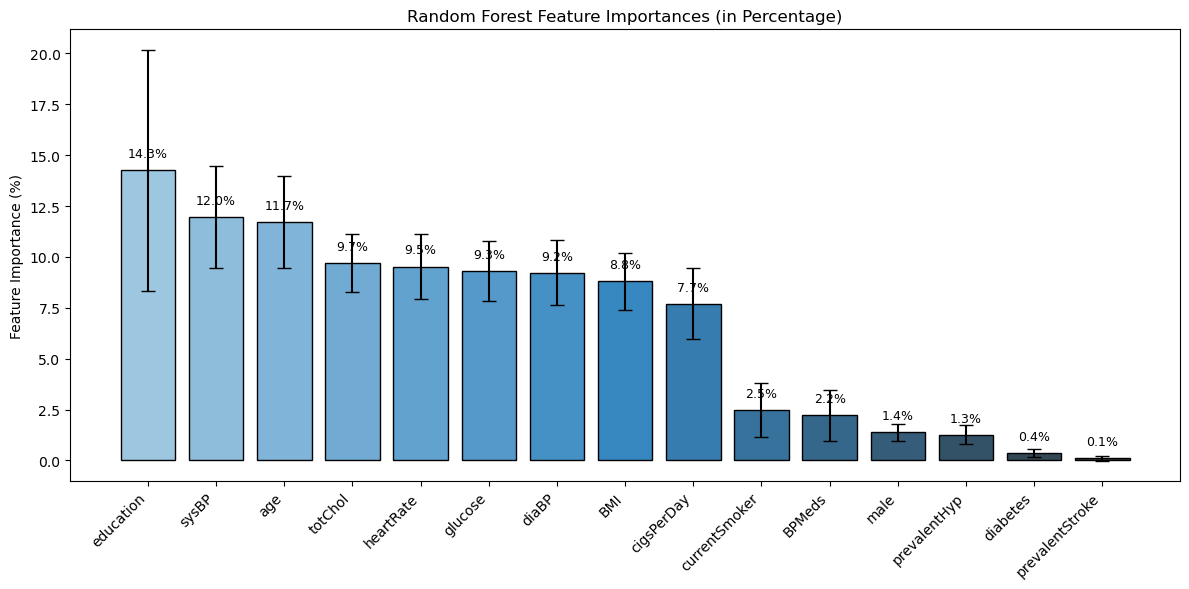

In [13]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Step 11: Visualize feature importances in percentage
importances = rf_model.feature_importances_
importances_percent = 100.0 * (importances / importances.sum())  # Convert to percentage
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0) * 100

# Create DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance (%)': importances_percent,
    'Std (%)': std
}).sort_values(by='Importance (%)', ascending=False)

# Set color palette
palette = sns.color_palette("Blues_d", len(importance_df))

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(importance_df['Feature'], importance_df['Importance (%)'],
               yerr=importance_df['Std (%)'], capsize=5,
               color=palette, edgecolor='black')

# Add text labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.ylabel('Feature Importance (%)')
plt.title('Random Forest Feature Importances (in Percentage)')
plt.tight_layout()
plt.show()



📊 Training Data Evaluation Metrics:
Accuracy       : 1.0000
Precision      : 1.0000
Recall         : 1.0000
F1 Score       : 1.0000
ROC AUC Score  : 1.0000
Confusion Matrix:
 [[2479    0]
 [   0 2482]]


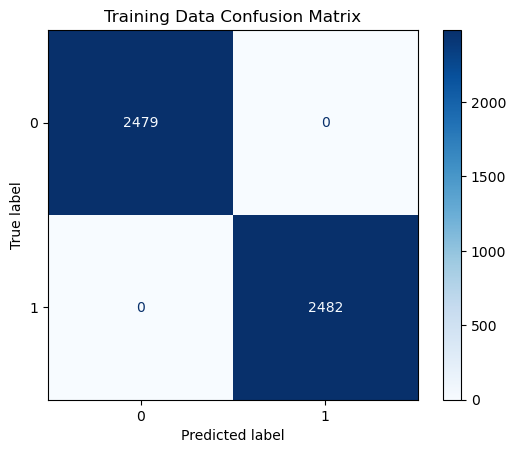

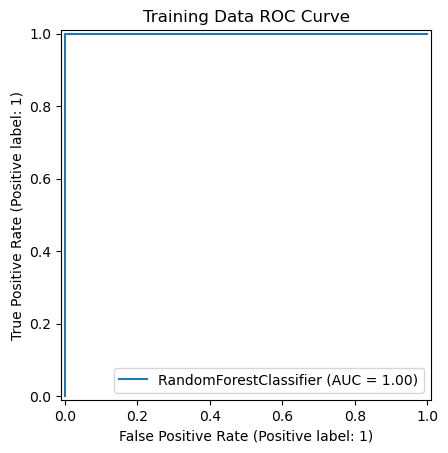


📊 Testing Data Evaluation Metrics:
Accuracy       : 0.9114
Precision      : 0.9426
Recall         : 0.8756
F1 Score       : 0.9079
ROC AUC Score  : 0.9633
Confusion Matrix:
 [[589  33]
 [ 77 542]]


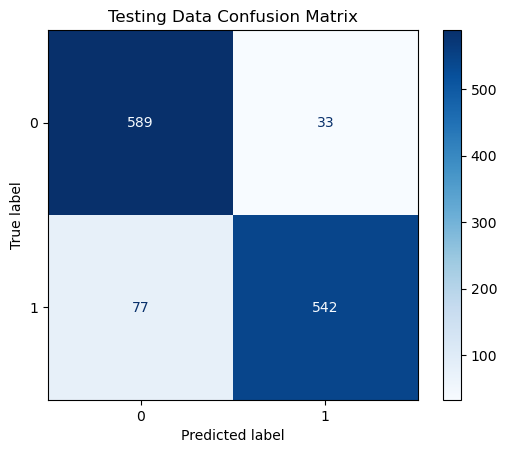

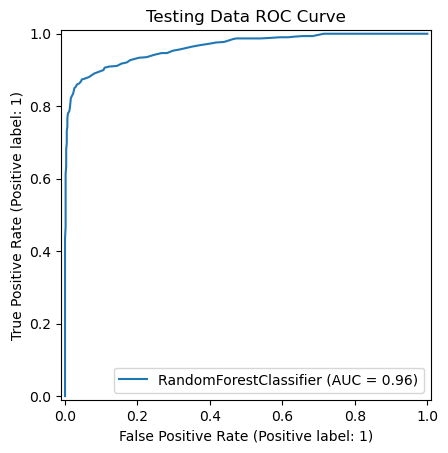

In [14]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay
)

# Function to evaluate model
def evaluate_model(model, X, y, dataset_name=""):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]

    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_proba)
    conf_mat = confusion_matrix(y, y_pred)

    print(f"\n📊 {dataset_name} Evaluation Metrics:")
    print(f"Accuracy       : {acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"ROC AUC Score  : {roc_auc:.4f}")
    print("Confusion Matrix:\n", conf_mat)

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    disp.plot(cmap='Blues')
    plt.title(f"{dataset_name} Confusion Matrix")
    plt.show()

    RocCurveDisplay.from_estimator(model, X, y)
    plt.title(f"{dataset_name} ROC Curve")
    plt.show()

# 🔍 Evaluate on training data
evaluate_model(rf_model, X_train, y_train, "Training Data")

# 🔍 Evaluate on testing data
evaluate_model(rf_model, X_test, y_test, "Testing Data")


In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = conf_matrix.ravel()

# Print results
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
total = TP+TN+FP+FN

accuracy = (TP+TN)/total
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2*(precision * recall)/(precision + recall)
print(accuracy)
print(precision)
print(recall)
print(f1_score)

True Positives (TP): 542
True Negatives (TN): 589
False Positives (FP): 33
False Negatives (FN): 77
0.911361804995971
0.9426086956521739
0.875605815831987
0.9078726968174203
